In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import style
from sklearn import impute
DATA = pd.read_csv("/content/drive/MyDrive/train_.csv",index_col="Unnamed: 0")
DATA

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ddd2926e,44956a24,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,96809ac8,711ee120,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b3cf8def,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,e8275b8f,6332421a,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,9644d0bf,779d90c2,1,0,18993,320,50,2161,0,35,-1,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1.311196e+19,0,14102103,1005,0,85f751fd,c4e18dd6,50e219e0,53de0284,d9b5648e,0f2161f8,a99f214a,b6d2d2fa,9b5ce758,1,0,21611,320,50,2480,3,299,100111,61
499996,1.311197e+19,0,14102103,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,e54c1344,a0f5f879,1,0,17614,320,50,1993,2,1063,-1,33
499997,1.311202e+19,0,14102103,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,0f2161f8,42625159,396a38a8,6f21a189,1,0,20633,320,50,2374,3,39,-1,23
499998,1.311205e+19,0,14102103,1005,1,5b4d2eda,16a36ef3,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,fa7a267e,05e70df4,1,0,20355,216,36,2333,0,39,100077,157


In [3]:
DATA.isnull().sum()

id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

In [4]:
DATA = DATA.drop_duplicates()

In [5]:
DATA["time"] = pd.to_datetime(DATA["hour"], format="%y%m%d%H")
DATA["hour"] = DATA["time"].dt.hour
DATA

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,time
0,1.000009e+18,0,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ddd2926e,44956a24,1,2,15706,320,50,1722,0,35,-1,79,2014-10-21 00:00:00
1,1.000017e+19,0,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,96809ac8,711ee120,1,0,15704,320,50,1722,0,35,100084,79,2014-10-21 00:00:00
2,1.000037e+19,0,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b3cf8def,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79,2014-10-21 00:00:00
3,1.000064e+19,0,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,e8275b8f,6332421a,1,0,15706,320,50,1722,0,35,100084,79,2014-10-21 00:00:00
4,1.000068e+19,0,0,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,9644d0bf,779d90c2,1,0,18993,320,50,2161,0,35,-1,157,2014-10-21 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1.311196e+19,0,3,1005,0,85f751fd,c4e18dd6,50e219e0,53de0284,d9b5648e,0f2161f8,a99f214a,b6d2d2fa,9b5ce758,1,0,21611,320,50,2480,3,299,100111,61,2014-10-21 03:00:00
499996,1.311197e+19,0,3,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,e54c1344,a0f5f879,1,0,17614,320,50,1993,2,1063,-1,33,2014-10-21 03:00:00
499997,1.311202e+19,0,3,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,0f2161f8,42625159,396a38a8,6f21a189,1,0,20633,320,50,2374,3,39,-1,23,2014-10-21 03:00:00
499998,1.311205e+19,0,3,1005,1,5b4d2eda,16a36ef3,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,fa7a267e,05e70df4,1,0,20355,216,36,2333,0,39,100077,157,2014-10-21 03:00:00


In [6]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                500000 non-null  float64       
 1   click             500000 non-null  int64         
 2   hour              500000 non-null  int64         
 3   C1                500000 non-null  int64         
 4   banner_pos        500000 non-null  int64         
 5   site_id           500000 non-null  object        
 6   site_domain       500000 non-null  object        
 7   site_category     500000 non-null  object        
 8   app_id            500000 non-null  object        
 9   app_domain        500000 non-null  object        
 10  app_category      500000 non-null  object        
 11  device_id         500000 non-null  object        
 12  device_ip         500000 non-null  object        
 13  device_model      500000 non-null  object        
 14  devi

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


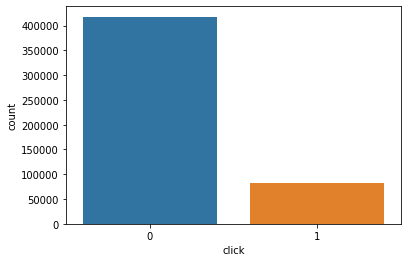

In [7]:
sns.countplot(DATA['click'], data=DATA)

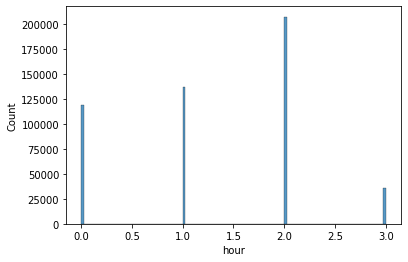

In [8]:
sns.histplot(data=DATA['click'], x=DATA["hour"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


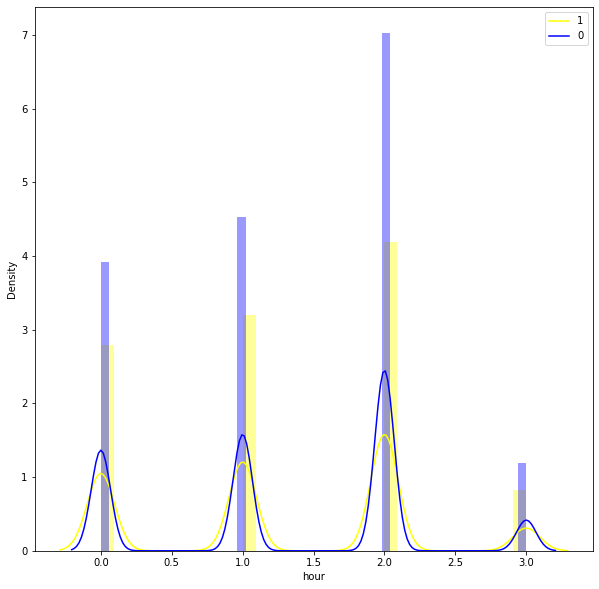

In [9]:
plt.figure(figsize=(10, 10))
sns.distplot(DATA['hour'][DATA['click']==1], color='yellow')
sns.distplot(DATA['hour'][DATA['click']==0], color='blue')
plt.legend(["1","0"]) 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


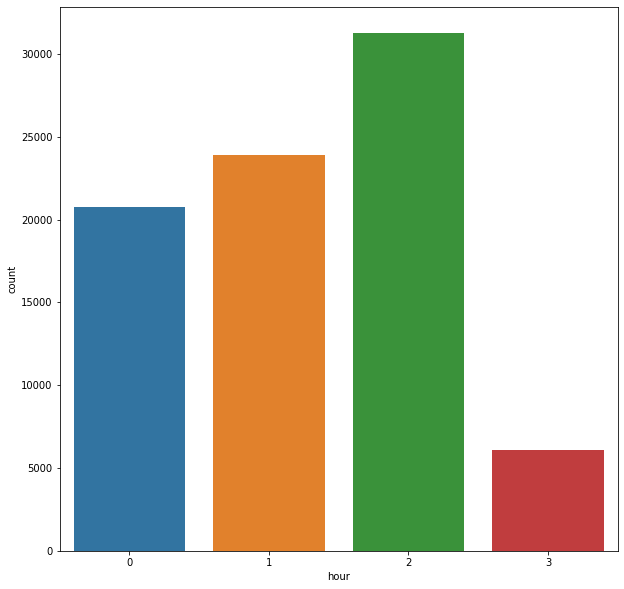

In [10]:
plt.figure(figsize=(10, 10))
sns.countplot(DATA['hour'][DATA['click']==1])
plt.show()

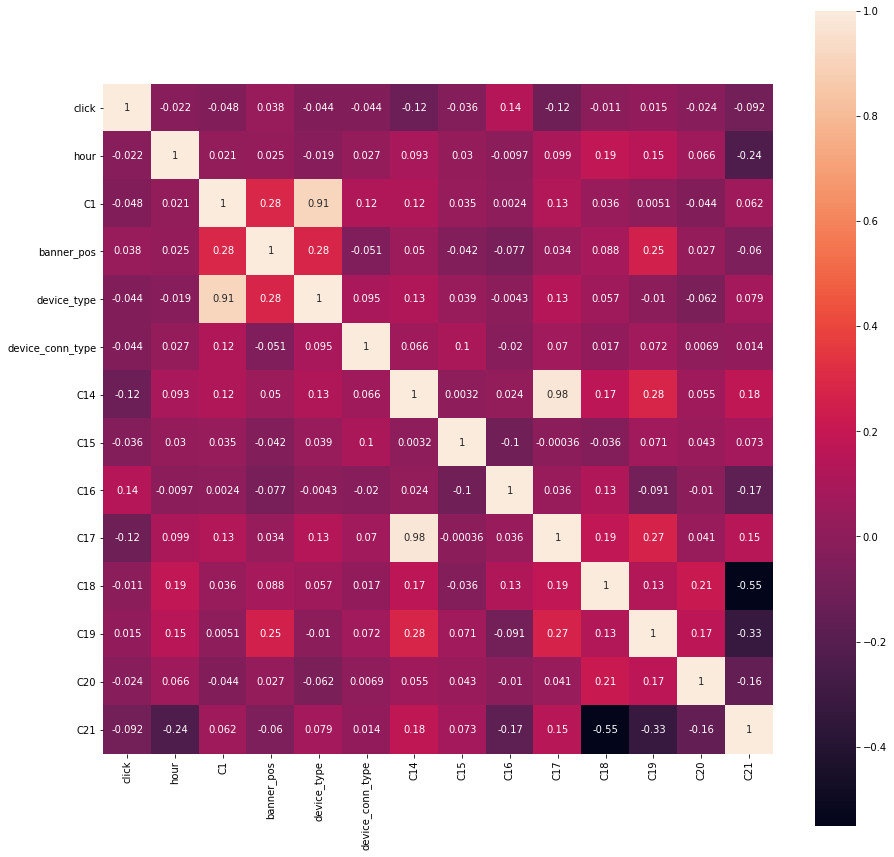

In [11]:
correlation = DATA.drop(["id"],axis=1).corr()
fig = plt.figure(figsize = (15,15))
sns.heatmap(correlation, annot = True, square = True)

1.   device type and C1 are strongly related
2.   C14 and C17 are strongly related
3.   C18 and C21 show some connection

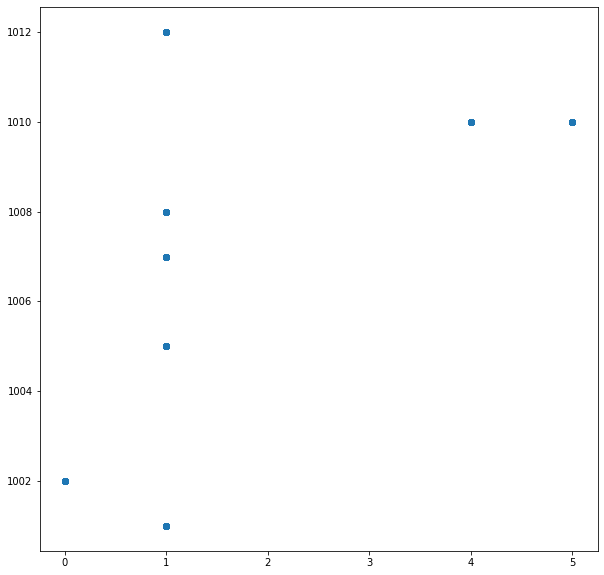

In [12]:
plt.figure(figsize=(10,10))
x = DATA['device_type']
y = DATA['C1']
plt.scatter(x, y)

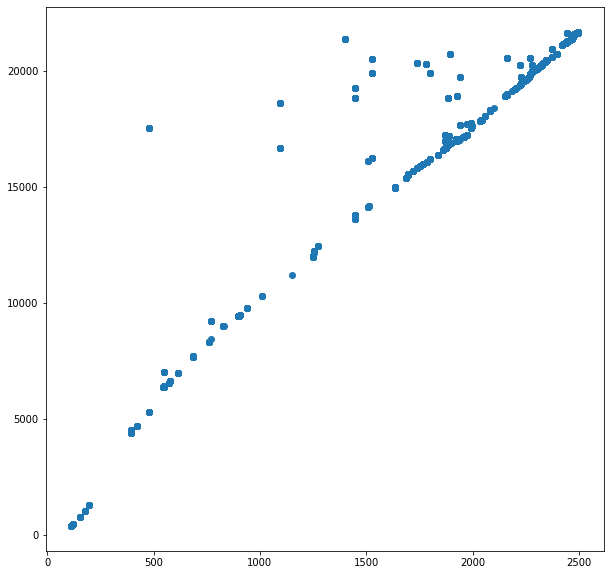

In [13]:
plt.figure(figsize=(10,10))
x = DATA['C17']
y = DATA['C14']
plt.scatter(x, y)

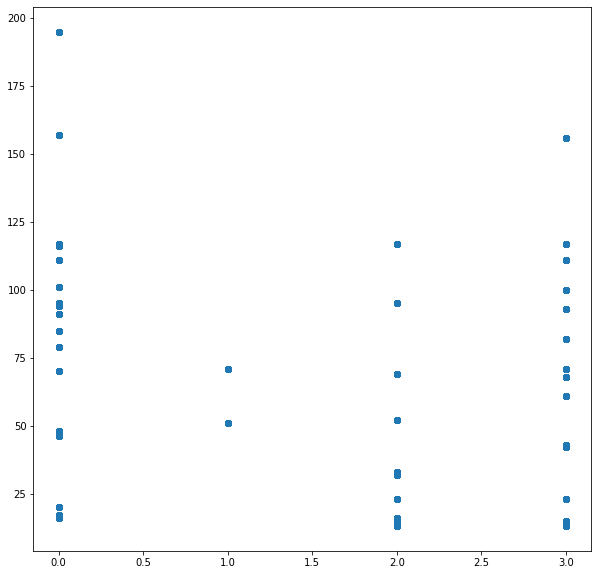

In [14]:
plt.figure(figsize=(10,10))
x = DATA['C18']
y = DATA['C21']
plt.scatter(x, y)

In [15]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                500000 non-null  float64       
 1   click             500000 non-null  int64         
 2   hour              500000 non-null  int64         
 3   C1                500000 non-null  int64         
 4   banner_pos        500000 non-null  int64         
 5   site_id           500000 non-null  object        
 6   site_domain       500000 non-null  object        
 7   site_category     500000 non-null  object        
 8   app_id            500000 non-null  object        
 9   app_domain        500000 non-null  object        
 10  app_category      500000 non-null  object        
 11  device_id         500000 non-null  object        
 12  device_ip         500000 non-null  object        
 13  device_model      500000 non-null  object        
 14  devi

In [16]:
DATA.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'time'],
      dtype='object')

In [17]:
DATA

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,time
0,1.000009e+18,0,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ddd2926e,44956a24,1,2,15706,320,50,1722,0,35,-1,79,2014-10-21 00:00:00
1,1.000017e+19,0,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,96809ac8,711ee120,1,0,15704,320,50,1722,0,35,100084,79,2014-10-21 00:00:00
2,1.000037e+19,0,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b3cf8def,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79,2014-10-21 00:00:00
3,1.000064e+19,0,0,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,e8275b8f,6332421a,1,0,15706,320,50,1722,0,35,100084,79,2014-10-21 00:00:00
4,1.000068e+19,0,0,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,9644d0bf,779d90c2,1,0,18993,320,50,2161,0,35,-1,157,2014-10-21 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1.311196e+19,0,3,1005,0,85f751fd,c4e18dd6,50e219e0,53de0284,d9b5648e,0f2161f8,a99f214a,b6d2d2fa,9b5ce758,1,0,21611,320,50,2480,3,299,100111,61,2014-10-21 03:00:00
499996,1.311197e+19,0,3,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,e54c1344,a0f5f879,1,0,17614,320,50,1993,2,1063,-1,33,2014-10-21 03:00:00
499997,1.311202e+19,0,3,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,0f2161f8,42625159,396a38a8,6f21a189,1,0,20633,320,50,2374,3,39,-1,23,2014-10-21 03:00:00
499998,1.311205e+19,0,3,1005,1,5b4d2eda,16a36ef3,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,fa7a267e,05e70df4,1,0,20355,216,36,2333,0,39,100077,157,2014-10-21 03:00:00


In [18]:
DATA.nunique()


id                  500000
click                    2
hour                     4
C1                       7
banner_pos               6
site_id               1704
site_domain           1586
site_category           21
app_id                1641
app_domain             122
app_category            20
device_id            41413
device_ip           171304
device_model          3967
device_type              4
device_conn_type         4
C14                    540
C15                      8
C16                      9
C17                    154
C18                      4
C19                     40
C20                    154
C21                     34
time                     4
dtype: int64

In [19]:
DATA = DATA.drop(['id', 'site_id', 'site_domain', 'app_id', 'app_domain', 'device_id',
       'device_ip','time'],axis=1)

In [20]:
DATA = DATA.drop(['device_model'],axis=1)

site id and site domain se better parameter is site category
same for app

In [21]:
DATA=pd.DataFrame(DATA,columns= [ 'click', 'hour', 'C1', 'banner_pos',
       'site_category', 'app_category', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'])

In [22]:
x=DATA.iloc[:,1:].values
y=DATA.iloc[:,0].values

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=9)


x : without id
X : without device_ip and id

In [24]:
x_train=pd.DataFrame(x_train,columns = [ 'hour', 'C1', 'banner_pos',
       'site_category', 'app_category', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'])

In [25]:
x_test=pd.DataFrame(x_test,columns = [ 'hour', 'C1', 'banner_pos',
       'site_category', 'app_category',  'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'])

In [26]:
x_train_dict = list(x_train.T.to_dict().values())
x_test_dict = list(x_test.T.to_dict().values())



In [27]:
x_train_dict[0]

{'C1': 1005,
 'C14': 15706,
 'C15': 320,
 'C16': 50,
 'C17': 1722,
 'C18': 0,
 'C19': 35,
 'C20': -1,
 'C21': 79,
 'app_category': '07d7df22',
 'banner_pos': 0,
 'device_conn_type': 0,
 'device_type': 1,
 'hour': 1,
 'site_category': '28905ebd'}

In [28]:
y_train=pd.DataFrame(y_train,columns = ['click'])
y_test=pd.DataFrame(y_test,columns = ['click'])

In [29]:
from sklearn.feature_extraction import DictVectorizer

vector = DictVectorizer(sparse=True)
x_train = vectorizer.fit_transform(x_train_dict)
x_test = vectorizer.transform(x_test_dict)

In [42]:
import pickle
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

In [43]:
x_train[0]

<1x52 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [44]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
test_pred = classifier.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, test_pred)

0.8351533333333333

In [47]:
train_pred = classifier.predict(x_train)

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,test_pred))
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91    125456
           1       0.30      0.01      0.01     24544

    accuracy                           0.84    150000
   macro avg       0.57      0.50      0.46    150000
weighted avg       0.75      0.84      0.76    150000

              precision    recall  f1-score   support

           0       0.84      1.00      0.91    292507
           1       0.34      0.01      0.01     57493

    accuracy                           0.83    350000
   macro avg       0.59      0.50      0.46    350000
weighted avg       0.75      0.83      0.76    350000



In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, test_pred)
print(cm)
print(accuracy_score(y_test, test_pred))
print(accuracy_score(y_train, train_pred))

[[125131    325]
 [ 24402    142]]
0.8351533333333333
0.8347228571428571


In [50]:
pickle.dump(classifier,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))